In [1]:
#import basic python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import re

In [2]:
#natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel

In [3]:
#machine learning libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [5]:
#evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [6]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/grace-
[nltk_data]     nyutu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/grace-
[nltk_data]     nyutu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
url = "https://www.airlinequality.com/airline-reviews/british-airways"

In [13]:
from bs4 import BeautifulSoup
import requests

In [14]:
# Define a function to scrape the reviews from a single page
def scrape_reviews(url, num_pages=1):
    reviews = []
    for page in range(1, num_pages + 1):
        # Request the page content
        response = requests.get(f"{url}/page/{page}")
        if response.status_code != 200:
            print(f"Failed to retrieve page {page}")
            continue
        soup = BeautifulSoup(response.content, "html.parser")

        # Find all review blocks
        review_blocks = soup.find_all("div", class_="body")

        for review in review_blocks:
            # Extract the text from each review block
            review_text = review.get_text(strip=True)
            reviews.append(review_text)
    return reviews

In [15]:
# Scrape the first 5 pages of reviews
reviews = scrape_reviews(url, num_pages=5)

In [16]:
df = pd.DataFrame(reviews, columns=["review_text"])

In [17]:
df.head()

,review_text
0,"""Absolute worst travel experience""S Drew(Unite..."
1,"""one of the worst airlines""Tim Taylor(United K..."
2,"""my travel pram confiscated from me""M Raulin(U..."
3,“VERY uncomfortable seats”M Owen(United States...
4,"""substandard business class experience""1 revie..."


In [18]:
# Data Cleaning
def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenize the text
    words = word_tokenize(text.lower())
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return " ".join(words)

df["cleaned_text"] = df["review_text"].apply(clean_text)

In [19]:
df["cleaned_text"].head()

0    absolute worst travel experiences drewunited s...
1    one worst airlinestim taylorunited kingdomth j...
2    travel pram confiscated mem raulinunited kingd...
3    uncomfortable seatsm owenunited statesth july ...
4    substandard business class experience reviewsb...
Name: cleaned_text, dtype: object

In [20]:
# Sentiment Analysis
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

df["sentiment"] = df["cleaned_text"].apply(analyze_sentiment)

In [21]:
df[["review_text", "sentiment"]].head()

,review_text,sentiment
0,"""Absolute worst travel experience""S Drew(Unite...",0.058929
1,"""one of the worst airlines""Tim Taylor(United K...",0.013469
2,"""my travel pram confiscated from me""M Raulin(U...",0.007407
3,“VERY uncomfortable seats”M Owen(United States...,-0.123529
4,"""substandard business class experience""1 revie...",-0.298810


In [22]:
# Topic Modeling
# Create a dictionary and corpus for LDA
texts = [text.split() for text in df["cleaned_text"]]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [23]:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.018*"ba" + 0.010*"flight" + 0.010*"service" + 0.008*"seats" + 0.006*"back"')
(1, '0.028*"flight" + 0.017*"ba" + 0.010*"us" + 0.007*"seat" + 0.006*"staff"')
(2, '0.016*"seat" + 0.010*"flight" + 0.009*"class" + 0.007*"business" + 0.007*"experience"')
(3, '0.018*"flight" + 0.012*"seat" + 0.011*"staff" + 0.008*"cabin" + 0.008*"comfortcabin"')
(4, '0.009*"staff" + 0.009*"trip" + 0.008*"seat" + 0.007*"ba" + 0.006*"flight"')


In [28]:
import pyLDAvis
import pyLDAvis.gensim

In [29]:
# Visualize Topics using pyLDAvis
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/home/grace-nyutu/.local/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=2559023) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/grace-nyutu/.local/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=2559023) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/grace-nyutu/.local/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=2559023) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/grace-nyutu/.local/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=2559023) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/grace-nyutu/.local/lib/python3.12/site-packages/joblib

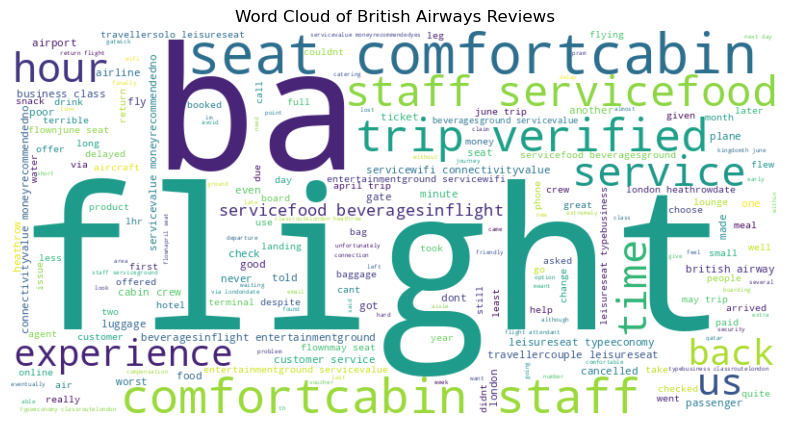

In [24]:
# Word Cloud Visualization
all_text = " ".join(df["cleaned_text"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of British Airways Reviews")
plt.show()